In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
OpenFile = pd.read_csv('advertising.csv')
FirstTen = OpenFile.head(10)
#print(FirstTen)

In [3]:
NumMiss = OpenFile.isnull().sum()
print(NumMiss)

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


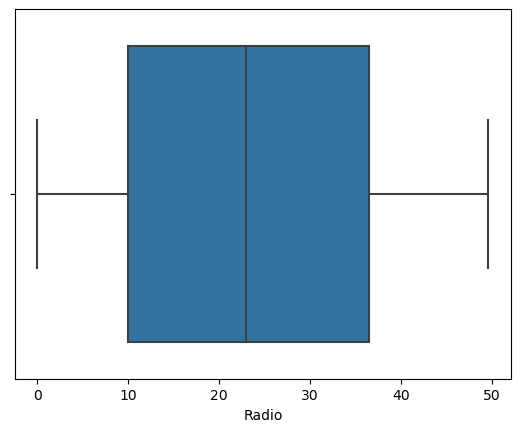

In [4]:
sns.boxplot(x=OpenFile["Radio"])
plt.show()

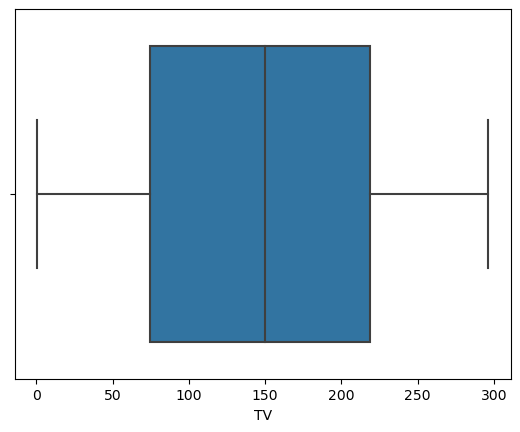

In [5]:
sns.boxplot(x=OpenFile["TV"])
plt.show()

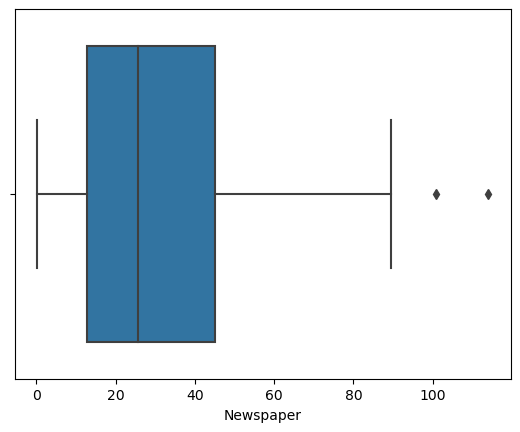

In [6]:
sns.boxplot(x=OpenFile["Newspaper"])
plt.show()

In [7]:
for x in ["Newspaper"]:
    q3,q1 = np.percentile(OpenFile.loc[:,x],[75,25])
    interquartile_range = q3 - q1
 
    max = q3 + (1.5 * interquartile_range)
    min = q1 - (1.5 * interquartile_range)
 
    OpenFile.loc[OpenFile[x] < min,x] = np.nan
    OpenFile.loc[OpenFile[x] > max,x] = np.nan

In [8]:
OpenFile.isnull().sum()

TV           0
Radio        0
Newspaper    2
Sales        0
dtype: int64

In [9]:
OpenFile = OpenFile.dropna(axis = 0)
OpenFile.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

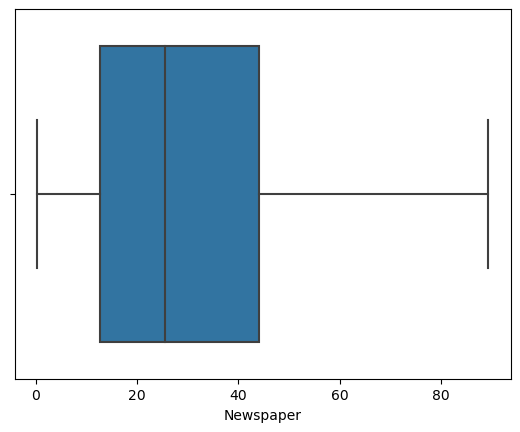

In [10]:
sns.boxplot(x=OpenFile["Newspaper"])
plt.show()

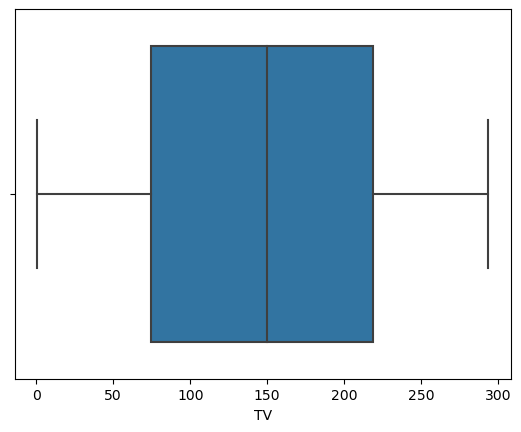

In [11]:
sns.boxplot(x=OpenFile["TV"])
plt.show()

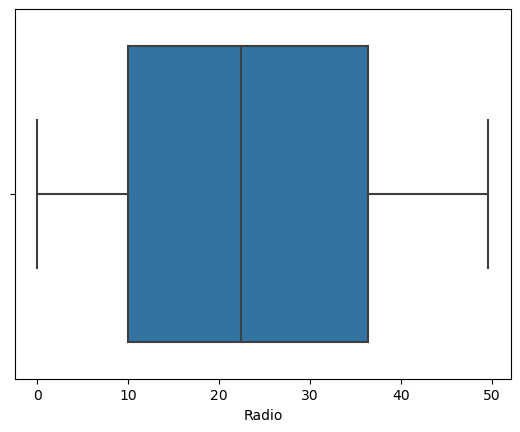

In [12]:
sns.boxplot(x=OpenFile["Radio"])
plt.show()

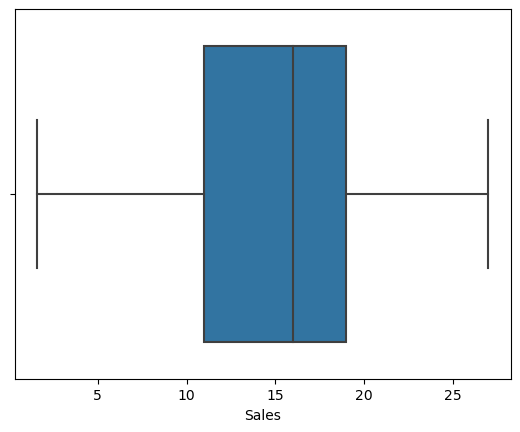

In [13]:
sns.boxplot(x=OpenFile["Sales"])
plt.show()

In [14]:
X = OpenFile.iloc[:, :-1].values
Y = OpenFile.iloc[:, -1].values

C:\Users\o3006\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


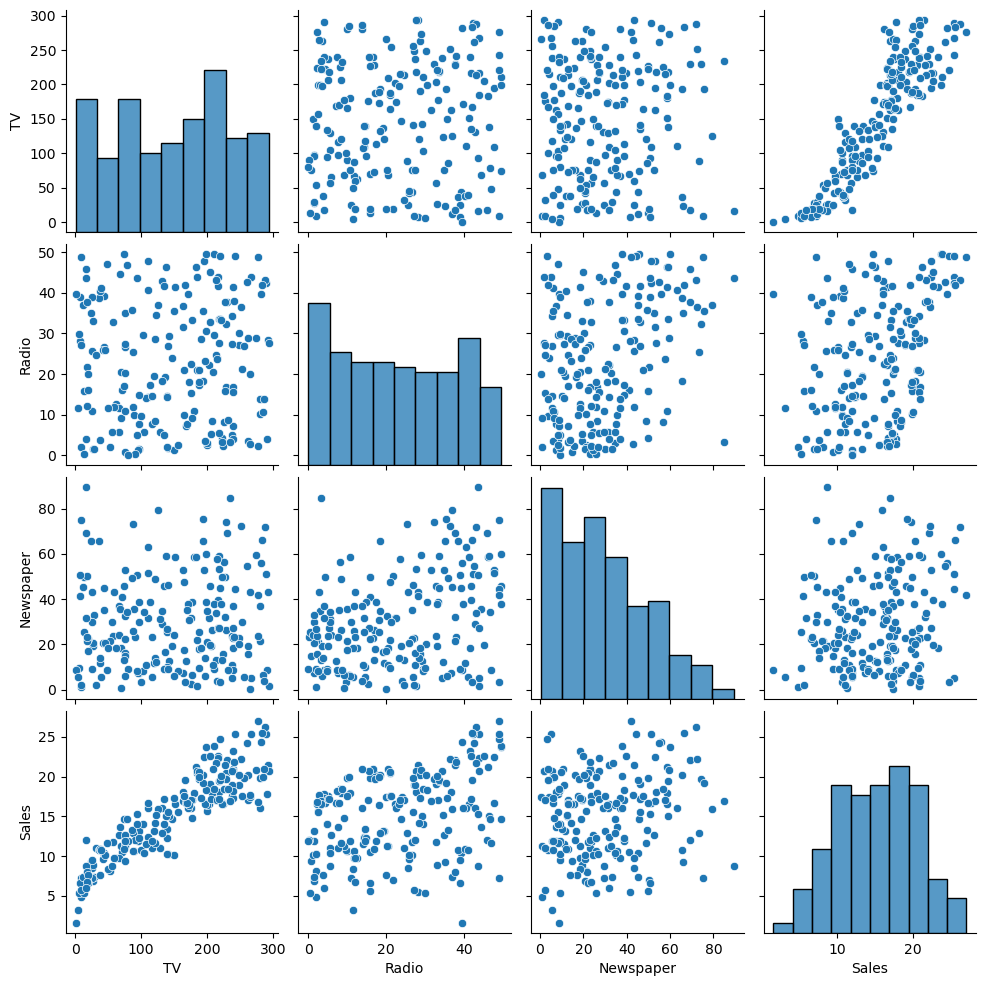

In [15]:
sns.pairplot(OpenFile)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [18]:
parameter = regressor.intercept_
parameter

4.6236953194840975

In [19]:
coefic = regressor.coef_
coefic

array([0.05395925, 0.10101512, 0.00746937])

In [20]:
y_predict_train = regressor.predict(X_train)
y_predict_train

array([19.04802199, 10.59298294, 13.68112535, 10.39791603,  7.30568312,
        7.8386798 , 16.47416023, 18.09438738,  9.94578763, 23.4872277 ,
       17.97038406, 16.83358202, 20.29369962,  7.16177183,  6.42381477,
       15.68366485, 11.83332691, 23.60976365, 13.23258411, 12.47297603,
       20.80859411,  8.63086951, 20.97369369, 10.24413795, 24.91106072,
       17.06553214, 23.27769416,  9.54907282,  9.83339805, 19.43731176,
       19.21622122,  6.56494167, 20.92317373, 10.70601577, 21.89882971,
       22.75759976, 15.16172674, 11.00396589, 13.98594832, 20.82435828,
       18.84544458, 21.45053298, 10.83394164,  9.98428982, 18.66298619,
        9.37377776, 19.96357796, 11.21517824, 20.95731449, 21.67750947,
       15.90670177, 20.97781473, 11.91454635, 12.45333081, 12.56182734,
       11.60015721,  8.95704803, 13.21810036, 16.63379975, 18.38170457,
       21.37497016, 14.70095884, 20.69425554, 12.22971596, 13.82850943,
        9.29304647, 16.58008495,  8.72664914, 10.35421042, 17.83

In [21]:
import math
MSE_train = np.square(np.subtract(Y_train,y_predict_train)).mean()
MSE_train

2.8332174960409424

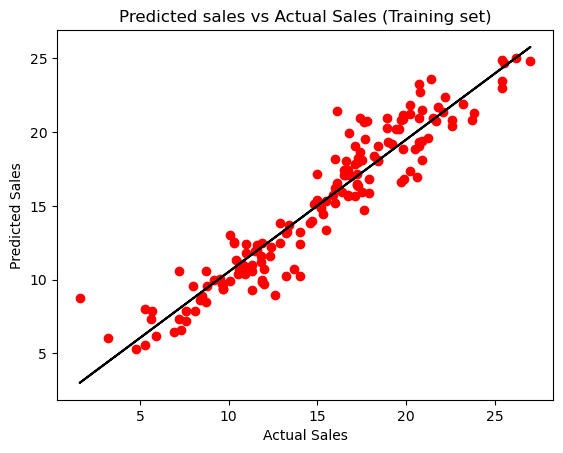

In [22]:
x = np.array(Y_train)
y = np.array(y_predict_train)
b1, b0 = np.polyfit(x, y, 1)

plt.scatter(Y_train, y_predict_train, color = 'red')
plt.title('Predicted sales vs Actual Sales (Training set)')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.plot(x, b1*x + b0, color='black')
plt.show()

In [23]:
from sklearn.metrics import r2_score
r2_score(Y_train, y_predict_train)

0.8973073018699194

In [24]:
y_predict_test = regressor.predict(X_test)

In [25]:
import math
MSE_test = np.square(np.subtract(Y_test,y_predict_test)).mean()
MSE_test

2.415728945593507

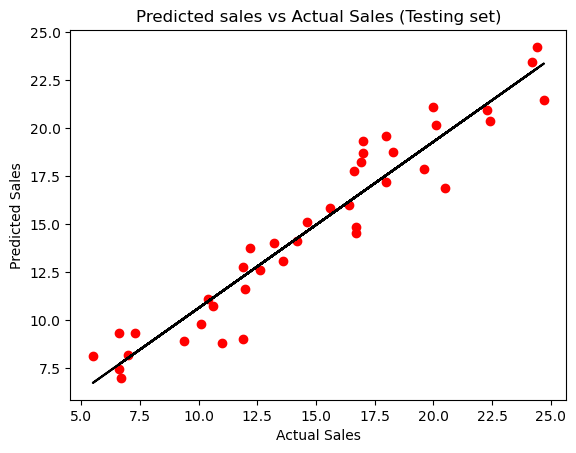

In [26]:
x = np.array(Y_test)
y = np.array(y_predict_test)
b1, b0 = np.polyfit(x, y, 1)

plt.scatter(Y_test, y_predict_test, color = 'red')
plt.title('Predicted sales vs Actual Sales (Testing set)')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.plot(x, b1*x + b0, color='black')
plt.show()

In [27]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_predict_test)

0.9130003152798273